# Bin correlation as a function of pseudo-count

In [2]:
import numpy as np
import pandas as pd
import pyBigWig as bw
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import entropy

# parameters
T = np.arange(0,48,4)
Strands = ['forward', 'reverse']
strand_dict = {'forward':'+', 'reverse':'-', '+':'forward', '-':'reverse'}
CHR = [f'chr{i}' for i in range(1,19)] + ['chrX','chrY','chrM']

n = 1
P = 24
N = len(T)

PC = 10**np.arange(-4,0.001,.5,dtype=float)

chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chrX
chrY
chrM
chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chrX
chrY
chrM


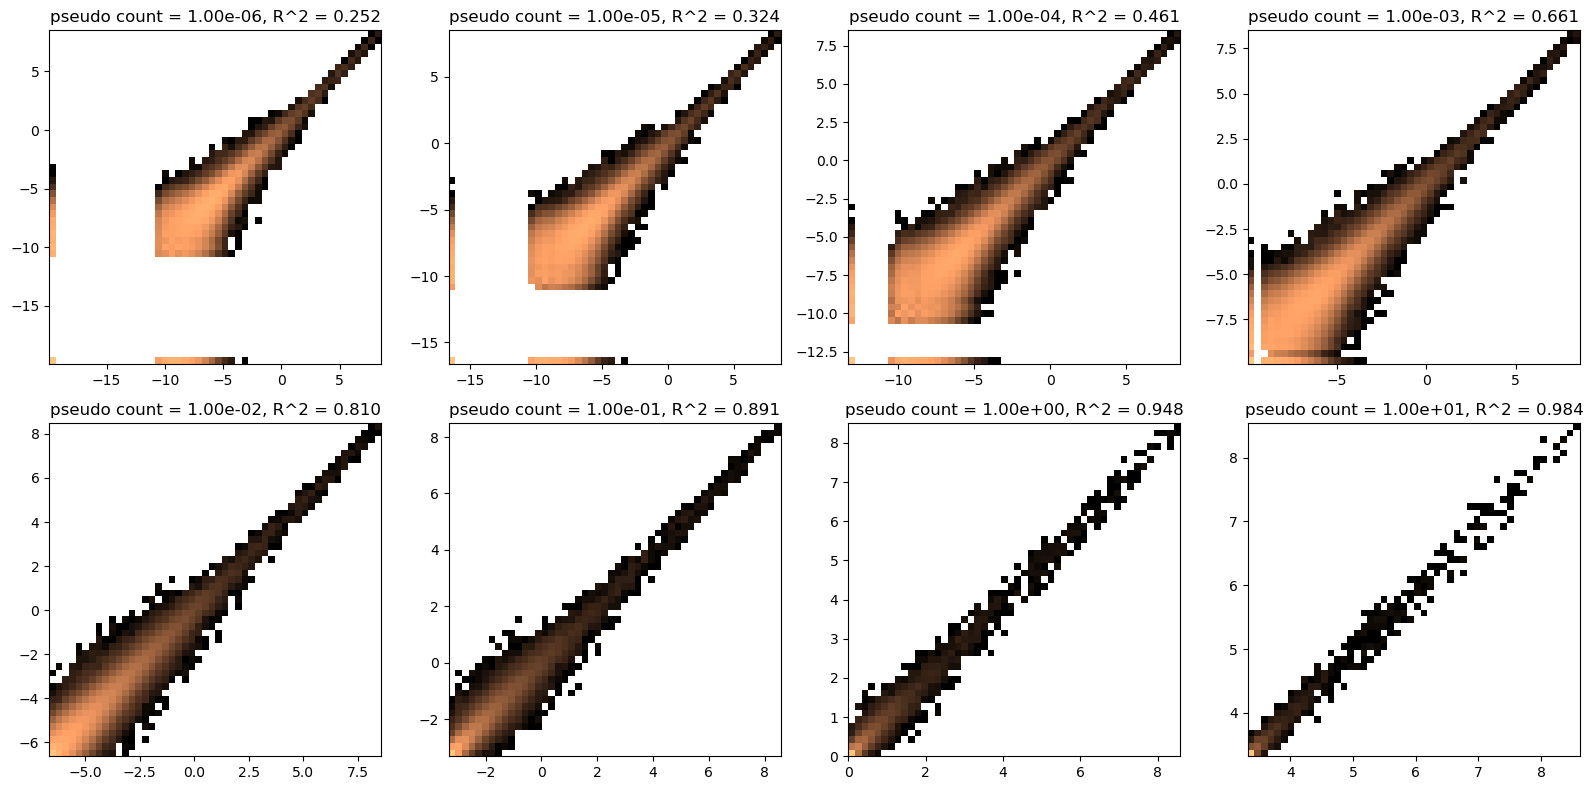

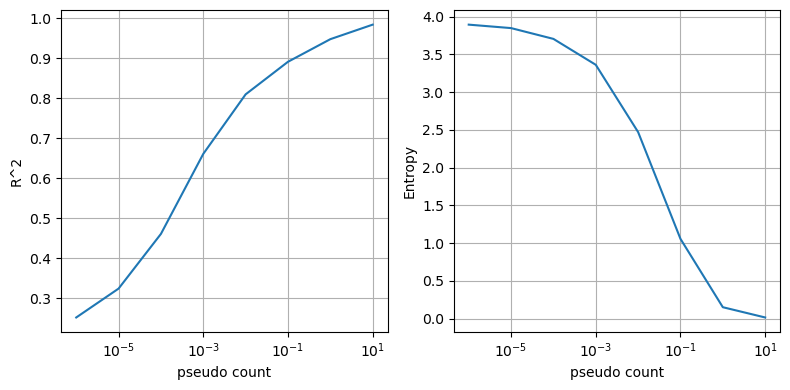

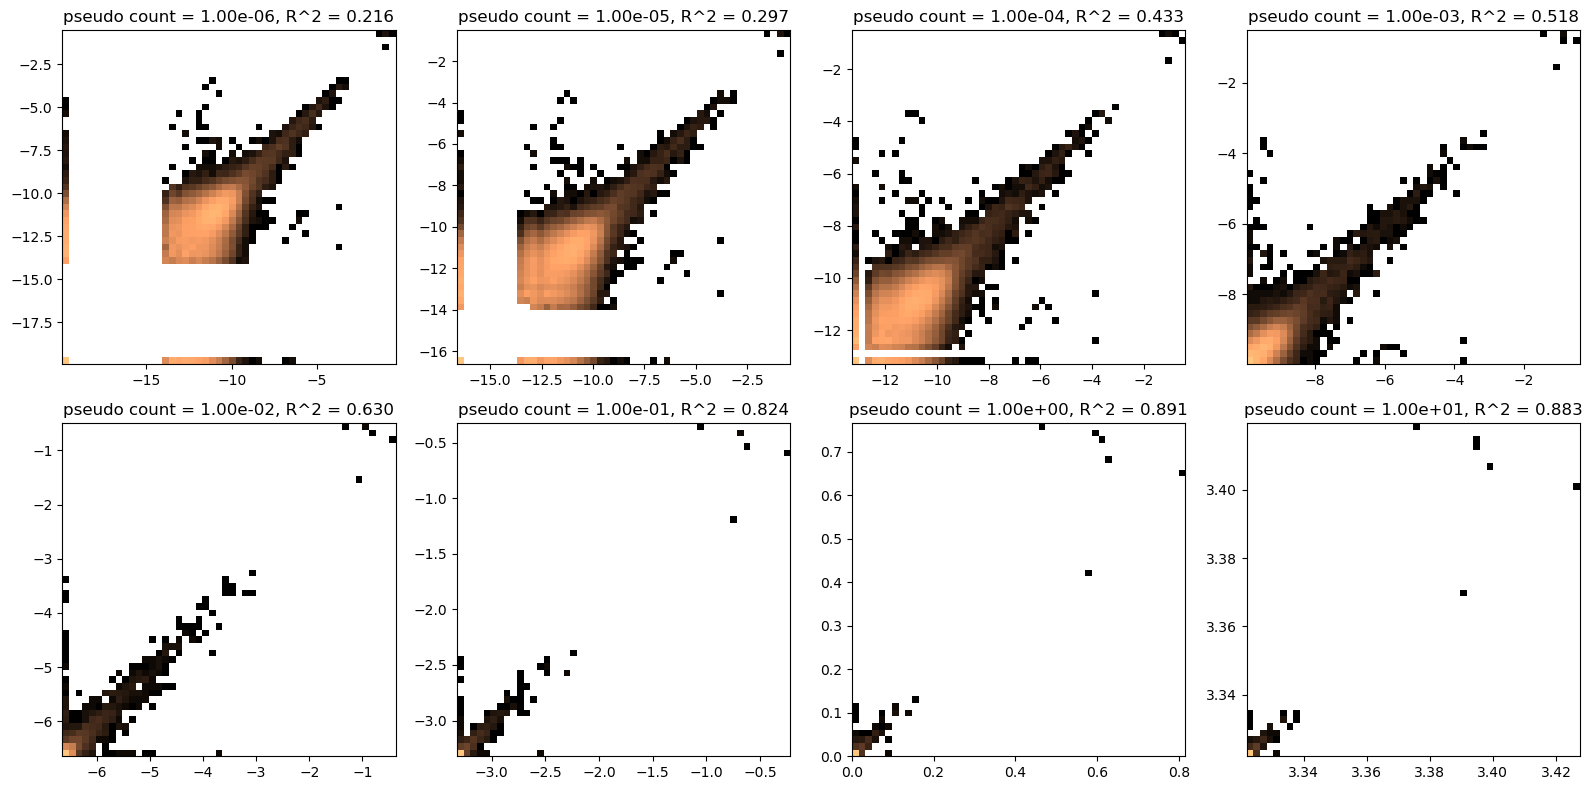

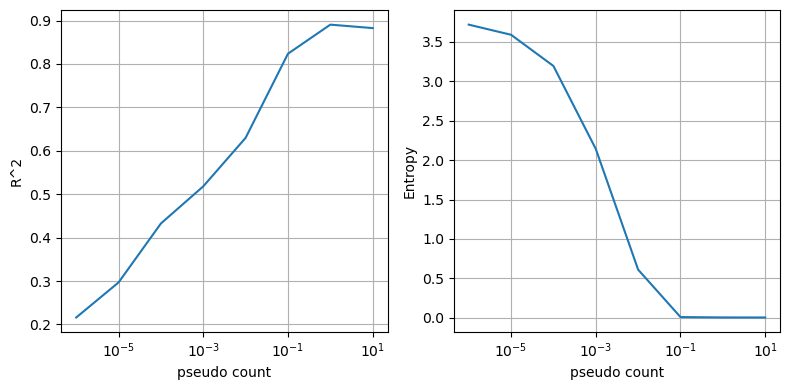

In [3]:
bw_path = '../results/binned_norm_counts'

for bin_size in [1000,10000]:

    # Load bigWigs
    bw_files = {}
    for t in T:
        sample = f'PRO_SEQ_CT{t:02d}_S{t//4+1}_R1_001'
        bw_files[t] = {}
        for strand in Strands:
            fin = f"{bw_path}/{sample}/NormCoverage_3p_{strand}_bin{bin_size}bp.bw"
            bw_files[t][strand] = bw.open(fin)

    # get data frame
    X = np.zeros((0,len(T)))
    for chr in CHR:
        print(chr)
        df_chr = {}
        for strand in ['forward','reverse']:
            df_chr[strand] = pd.DataFrame(columns=['start','end'])
            for t in T:
                df_t = pd.DataFrame(bw_files[t][strand].intervals(chr))
                df_t.columns = ['start','end',f"{t}"]
                df_chr[strand] = pd.merge(df_chr[strand],df_t,on=['start','end'],how='outer')
            df_chr[strand].sort_values('start',inplace=True)

        # merge forward and reverse (sum)
        df_chr = pd.merge(df_chr['forward'],df_chr['reverse'],on=['start','end'],how='outer')
        for t in T:
            idx_na = df_chr[[f"{t}_x",f"{t}_y"]].isna().all(1)
            df_chr[f"{t}"] = df_chr[[f"{t}_x",f"{t}_y"]].sum(1)
            df_chr.loc[idx_na,f"{t}"] = np.nan
            df_chr.drop([f"{t}_x",f"{t}_y"],axis=1,inplace=True)

        # append to data frame
        X = np.concatenate((X,df_chr[[f"{t}" for t in T]].values),axis=0)


    # remove position with 75% or more missing values (at least 5 out of 12 time points)
    X = X[(np.isnan(X).sum(1) < len(T)*0.75),:]

    # replace missing values with 0
    X[np.isnan(X)] = 0

    PC = 10**np.arange(-6,1.001,1,dtype=float)

    t1 = T<24
    t2 = ~t1

    pc_R2 = np.zeros((len(PC),2))
    pc_R2[:,0] = PC
    E = np.zeros((len(PC),2))
    E[:,0] = PC

    n_col = 4
    n_row = np.ceil(len(PC)/n_col).astype(int)

    fig, axes = plt.subplots(n_row,n_col,figsize=(n_col*4,n_row*4))
    for i,pc in enumerate(PC):

        # add pseudo count
        #X += pc

        if True:
            # take the log of the data
            if pc == 0:
                X_log = X
            else:
                X_log = np.log2(X+pc)

            pc_R2[i,1] = np.corrcoef(X_log[:,t1].flatten(),X_log[:,t2].flatten())[0,1]**2
            E[i,1] = entropy(np.histogram(X_log.mean(1),bins=100,density=True)[0])


        ax = axes.flatten()[i]
        ax.hist2d(X_log[:,t1].flatten(),X_log[:,t2].flatten(),bins=50,cmap='copper',norm=mpl.colors.LogNorm())
        ax.set_title(f'pseudo count = {pc:.2e}, R^2 = {pc_R2[i,1]:.3f}')

    fig.tight_layout()

    plt.figure(figsize=(8,4))

    ax = plt.subplot(121)
    ax.plot(pc_R2[:,0],pc_R2[:,1])
    ax.set_xlabel('pseudo count')
    ax.set_ylabel('R^2')
    ax.set_xscale('log')
    ax.grid()

    ax = plt.subplot(122)
    ax.plot(E[:,0],E[:,1])
    ax.set_xlabel('pseudo count')
    ax.set_ylabel('Entropy')
    ax.set_xscale('log')
    ax.grid()

    plt.tight_layout()



chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chrX
chrY
chrM
chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chrX
chrY
chrM


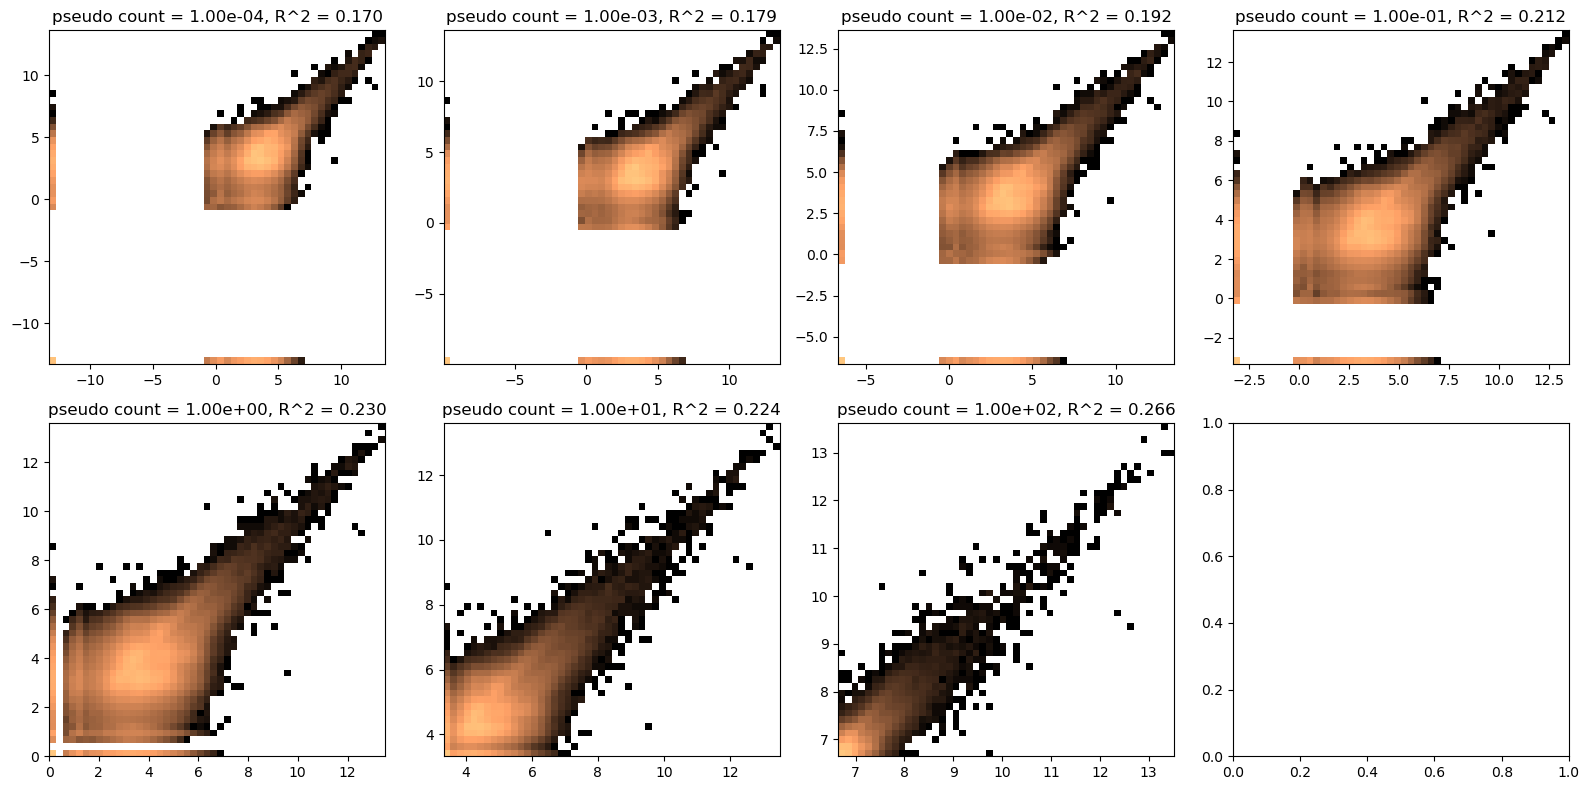

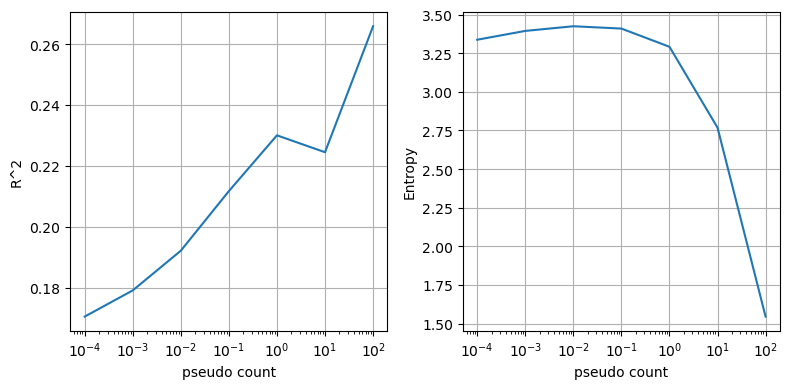

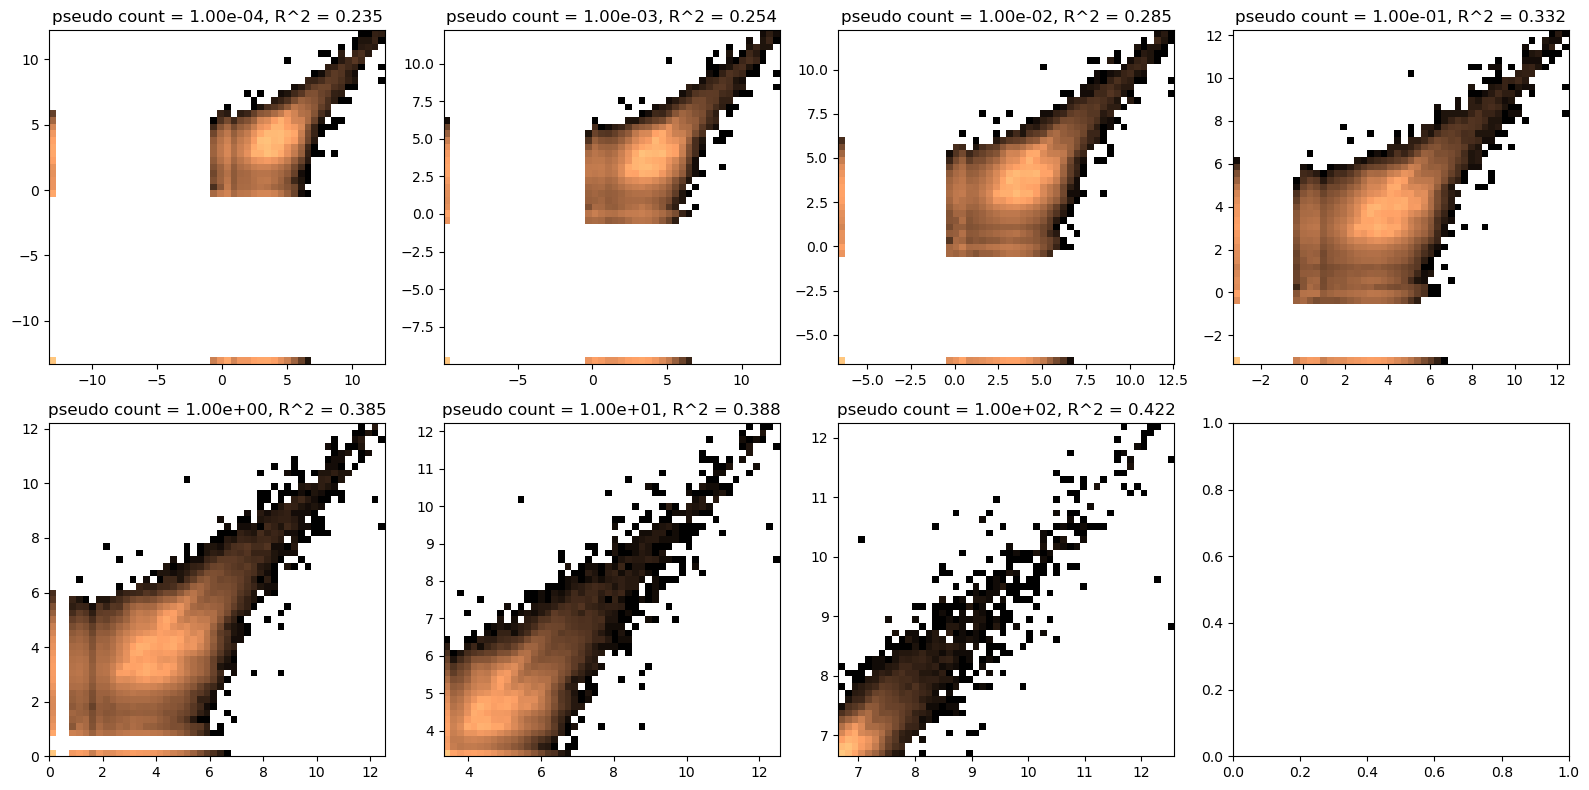

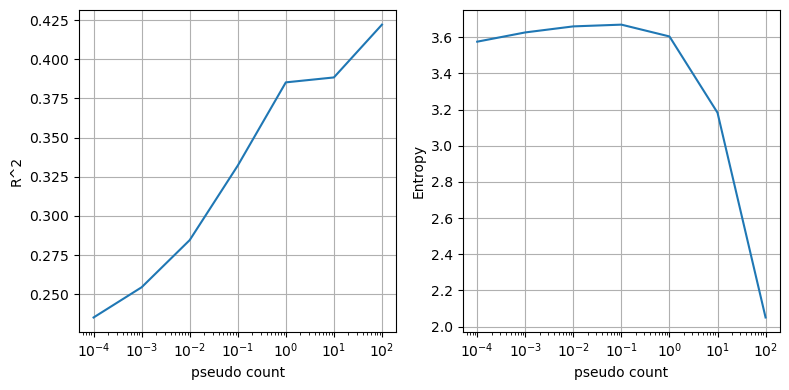

In [6]:
bw_path = '../results/binned_norm_coverage'

for bin_size in [1000,10000]:

    # Load bigWigs
    bw_files = {}
    for t in T:
        sample = f'CT{t:02d}'
        bw_files[t] = {}
        for strand in Strands:
            fin = f"{bw_path}/{sample}/NormCoverage_3p_{strand}_bin{bin_size}bp.bw"
            bw_files[t][strand] = bw.open(fin)

    # get data frame
    X = np.zeros((0,len(T)))
    for chr in CHR:
        print(chr)
        df_chr = {}
        for strand in ['forward','reverse']:
            df_chr[strand] = pd.DataFrame(columns=['start','end'])
            for t in T:
                df_t = pd.DataFrame(bw_files[t][strand].intervals(chr))
                df_t.columns = ['start','end',f"{t}"]
                df_chr[strand] = pd.merge(df_chr[strand],df_t,on=['start','end'],how='outer')
            df_chr[strand].sort_values('start',inplace=True)

        # merge forward and reverse (sum)
        df_chr = pd.merge(df_chr['forward'],df_chr['reverse'],on=['start','end'],how='outer')
        for t in T:
            idx_na = df_chr[[f"{t}_x",f"{t}_y"]].isna().all(1)
            df_chr[f"{t}"] = df_chr[[f"{t}_x",f"{t}_y"]].sum(1)
            df_chr.loc[idx_na,f"{t}"] = np.nan
            df_chr.drop([f"{t}_x",f"{t}_y"],axis=1,inplace=True)

        # append to data frame
        X = np.concatenate((X,df_chr[[f"{t}" for t in T]].values),axis=0)


    # remove position with 75% or more missing values (at least 5 out of 12 time points)
    X = X[(np.isnan(X).sum(1) < len(T)*0.75),:]

    # replace missing values with 0
    X[np.isnan(X)] = 0

    PC = 10**np.arange(-4,2.001,1,dtype=float)

    t1 = T<24
    t2 = ~t1

    pc_R2 = np.zeros((len(PC),2))
    pc_R2[:,0] = PC
    E = np.zeros((len(PC),2))
    E[:,0] = PC

    n_col = 4
    n_row = np.ceil(len(PC)/n_col).astype(int)

    fig, axes = plt.subplots(n_row,n_col,figsize=(n_col*4,n_row*4))
    for i,pc in enumerate(PC):

        # add pseudo count
        #X += pc

        if True:
            # take the log of the data
            if pc == 0:
                X_log = X
            else:
                X_log = np.log2(X+pc)

            pc_R2[i,1] = np.corrcoef(X_log[:,t1].flatten(),X_log[:,t2].flatten())[0,1]**2
            E[i,1] = entropy(np.histogram(X_log.mean(1),bins=100,density=True)[0])


        ax = axes.flatten()[i]
        ax.hist2d(X_log[:,t1].flatten(),X_log[:,t2].flatten(),bins=50,cmap='copper',norm=mpl.colors.LogNorm())
        ax.set_title(f'pseudo count = {pc:.2e}, R^2 = {pc_R2[i,1]:.3f}')

    fig.tight_layout()

    plt.figure(figsize=(8,4))

    ax = plt.subplot(121)
    ax.plot(pc_R2[:,0],pc_R2[:,1])
    ax.set_xlabel('pseudo count')
    ax.set_ylabel('R^2')
    ax.set_xscale('log')
    ax.grid()

    ax = plt.subplot(122)
    ax.plot(E[:,0],E[:,1])
    ax.set_xlabel('pseudo count')
    ax.set_ylabel('Entropy')
    ax.set_xscale('log')
    ax.grid()

    plt.tight_layout()

